In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,classification_report
#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb



from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

ERROR: Could not find a version that satisfies the requirement distultis (from versions: none)
ERROR: No matching distribution found for distultis
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
df=pd.read_csv('data-1.csv')
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,50,55189,574,Employed,Associate,24,12598,72,Single,...,4599.083333,0.932225,8,112204,0.240598,0.212997,311.323799,0.122921,1,42.4
1,2018-01-02,32,55198,578,Employed,Bachelor,8,7957,72,Single,...,4599.833333,0.953615,3,10381,0.233957,0.216677,198.362052,0.205738,0,55.0
2,2018-01-03,53,52726,608,Employed,Master,29,25760,84,Married,...,4393.833333,0.764863,7,44522,0.246760,0.243465,641.303561,0.333719,0,53.0
3,2018-01-04,32,61565,602,Employed,Associate,8,40015,84,Married,...,5130.416667,0.879747,4,3312,0.264015,0.264501,1050.239159,0.232971,0,54.0
4,2018-01-05,20,19346,591,Self-Employed,Bachelor,0,23541,60,Single,...,1612.166667,0.922278,1,88157,0.233041,0.250037,691.010520,0.645101,0,56.0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [4]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [5]:
df.duplicated().sum()


np.int64(0)

In [6]:
df['ApplicationDate']=pd.to_datetime(df['ApplicationDate'])

In [7]:
encoder=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=encoder.fit_transform(df[col])


In [8]:
X = df.drop(columns=['ApplicationDate', 'LoanApproved'])  # Dropping non-relevant columns
Y = df['LoanApproved']  # Target variable
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42 , shuffle=True)

#Check
print("X_Test Shape = " , x_test.shape)
print("Y_Test Shape = " , y_test.shape)
print("X_Train Shape = " , x_train.shape)
print("Y_Train Shape = " , y_train.shape)

X_Test Shape =  (4000, 34)
Y_Test Shape =  (4000,)
X_Train Shape =  (16000, 34)
Y_Train Shape =  (16000,)


In [9]:
models = {
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=500)
}

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

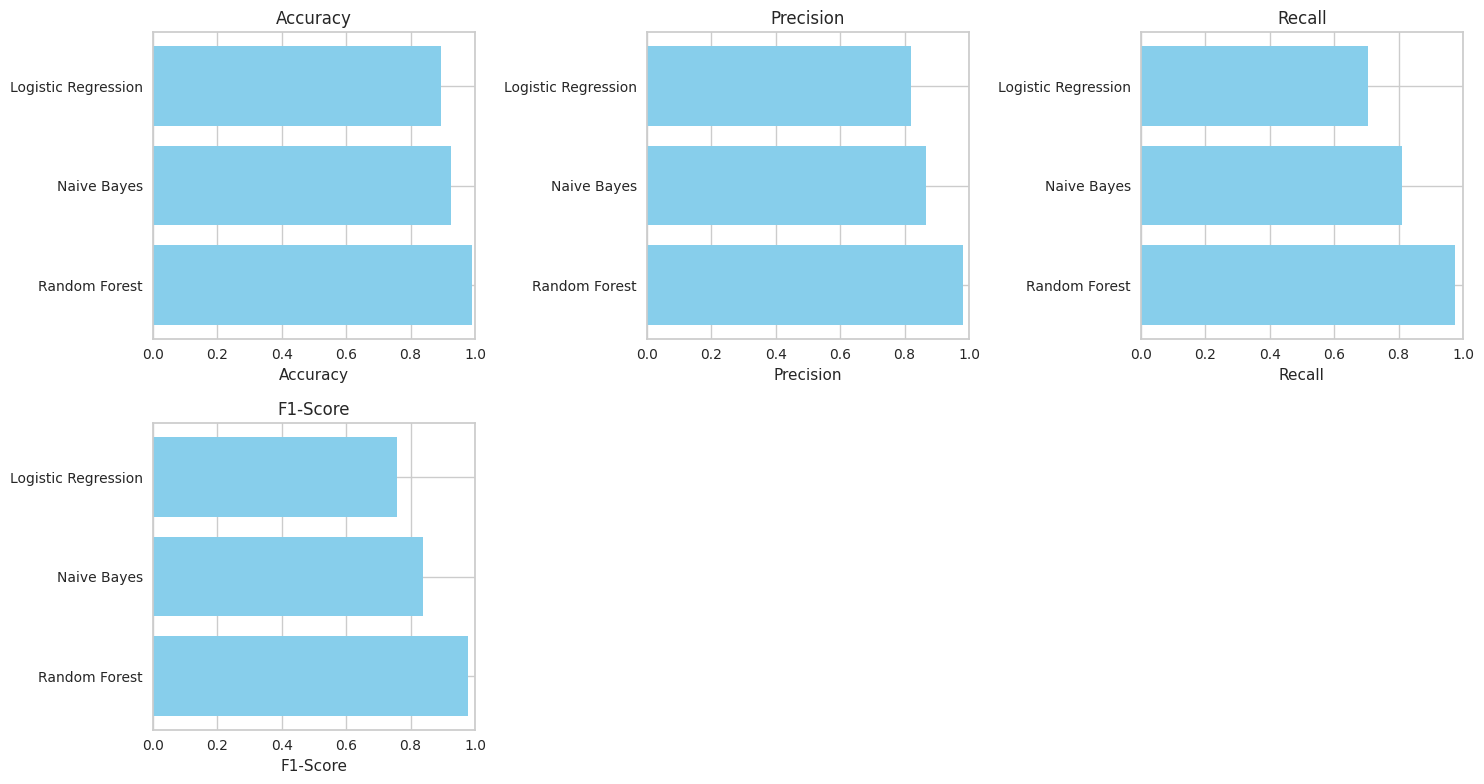

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary to store results
results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': []}

# Evaluate each model
for i in models:
    obj = models[i]
    obj.fit(x_train, y_train)
    obj_pred = obj.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, obj_pred)
    precision = precision_score(y_test, obj_pred)
    recall = recall_score(y_test, obj_pred)
    f1 = f1_score(y_test, obj_pred)

    # Store results in the dictionary
    results['Model'].append(i)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1-Score'].append(f1)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting each metric
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

In [11]:
x = df.drop(columns=['ApplicationDate','RiskScore'])  
y = df['RiskScore']

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=69)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

models = {
    "Linear_Regression": LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressor": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),
    "MLP_Regressor": MLPRegressor(max_iter=500)
}

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

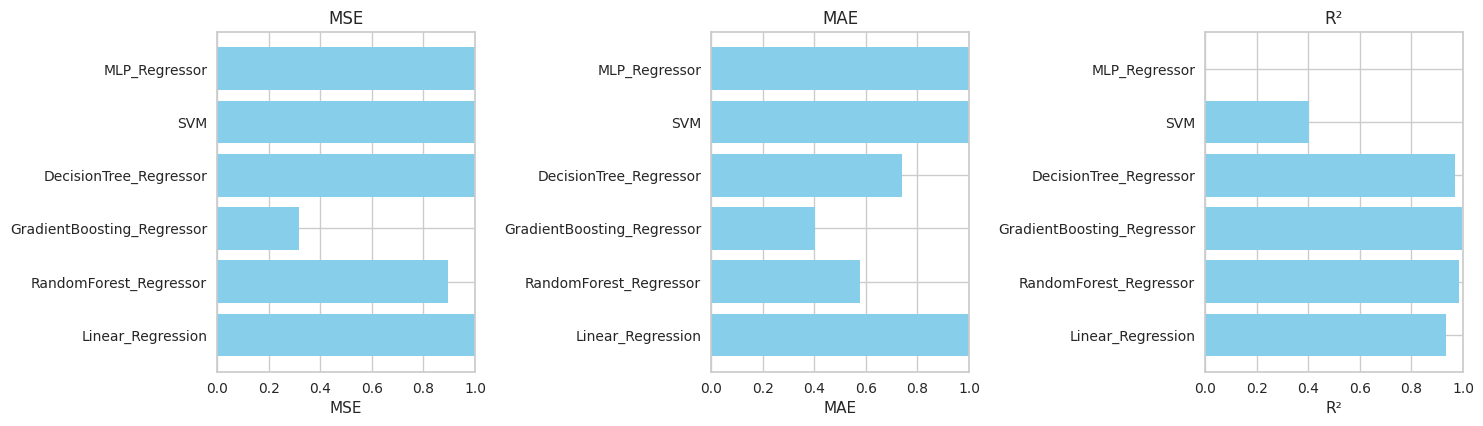

In [13]:
# Dictionary to store results
results = {'Model': [], 'MSE': [], 'MAE': [], 'R²': []}

# Loop through the models, train them, and calculate the metrics
for model_name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results in the dictionary
    results['Model'].append(model_name)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    results['R²'].append(r2)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Plotting each metric
metrics = ['MSE', 'MAE', 'R²']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['Model'], results_df[metric], color='skyblue')
    plt.title(metric)
    plt.xlim(0, 1)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()

In [ ]:
# Define a function to predict RiskScore using the most accurate model
def predict_risk_score():
    # Prompt the user to input values for the required features
    print("Enter the following details:")
    Age = int(input("Age: "))
    AnnualIncome = int(input("Annual Income: "))
    CreditScore = int(input("Credit Score: "))
    EmploymentStatus = int(input("Employment Status (0/1): "))
    EducationLevel = int(input("Education Level (0-4): "))
    Experience = int(input("Experience (in years): "))
    LoanAmount = int(input("Loan Amount: "))
    LoanDuration = int(input("Loan Duration (in months): "))
    MaritalStatus = int(input("Marital Status (0/1/2): "))
    NumberOfDependents = int(input("Number of Dependents: "))
    HomeOwnershipStatus = int(input("Home Ownership Status (0-3): "))
    MonthlyDebtPayments = float(input("Monthly Debt Payments: "))
    CreditCardUtilizationRate = float(input("Credit Card Utilization Rate: "))
    NumberOfOpenCreditLines = int(input("Number of Open Credit Lines: "))
    NumberOfCreditInquiries = int(input("Number of Credit Inquiries: "))
    DebtToIncomeRatio = float(input("Debt to Income Ratio: "))
    BankruptcyHistory = int(input("Bankruptcy History (0/1): "))
    LoanPurpose = int(input("Loan Purpose (0-4): "))
    PreviousLoanDefaults = int(input("Previous Loan Defaults (0/1): "))
    PaymentHistory = int(input("Payment History (0-30): "))
    LengthOfCreditHistory = int(input("Length of Credit History (in years): "))
    SavingsAccountBalance = int(input("Savings Account Balance: "))
    CheckingAccountBalance = int(input("Checking Account Balance: "))
    TotalAssets = int(input("Total Assets: "))
    TotalLiabilities = int(input("Total Liabilities: "))
    MonthlyIncome = float(input("Monthly Income: "))
    UtilityBillsPaymentHistory = float(input("Utility Bills Payment History: "))
    JobTenure = int(input("Job Tenure (in years): "))
    NetWorth = int(input("Net Worth: "))
    BaseInterestRate = float(input("Base Interest Rate: "))
    InterestRate = float(input("Interest Rate: "))
    MonthlyLoanPayment = float(input("Monthly Loan Payment: "))
    TotalDebtToIncomeRatio = float(input("Total Debt to Income Ratio: "))

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Age': [Age],
        'AnnualIncome': [AnnualIncome],
        'CreditScore': [CreditScore],
        'EmploymentStatus': [EmploymentStatus],
        'EducationLevel': [EducationLevel],
        'Experience': [Experience],
        'LoanAmount': [LoanAmount],
        'LoanDuration': [LoanDuration],
        'MaritalStatus': [MaritalStatus],
        'NumberOfDependents': [NumberOfDependents],
        'HomeOwnershipStatus': [HomeOwnershipStatus],
        'MonthlyDebtPayments': [MonthlyDebtPayments],
        'CreditCardUtilizationRate': [CreditCardUtilizationRate],
        'NumberOfOpenCreditLines': [NumberOfOpenCreditLines],
        'NumberOfCreditInquiries': [NumberOfCreditInquiries],
        'DebtToIncomeRatio': [DebtToIncomeRatio],
        'BankruptcyHistory': [BankruptcyHistory],
        'LoanPurpose': [LoanPurpose],
        'PreviousLoanDefaults': [PreviousLoanDefaults],
        'PaymentHistory': [PaymentHistory],
        'LengthOfCreditHistory': [LengthOfCreditHistory],
        'SavingsAccountBalance': [SavingsAccountBalance],
        'CheckingAccountBalance': [CheckingAccountBalance],
        'TotalAssets': [TotalAssets],
        'TotalLiabilities': [TotalLiabilities],
        'MonthlyIncome': [MonthlyIncome],
        'UtilityBillsPaymentHistory': [UtilityBillsPaymentHistory],
        'JobTenure': [JobTenure],
        'NetWorth': [NetWorth],
        'BaseInterestRate': [BaseInterestRate],
        'InterestRate': [InterestRate],
        'MonthlyLoanPayment': [MonthlyLoanPayment],
        'TotalDebtToIncomeRatio': [TotalDebtToIncomeRatio]
    })

    # Use the most accurate model to predict RiskScore
    predicted_risk_score = models['RandomForest_Regressor'].predict(input_data)[0]
    print(f"Predicted RiskScore: {predicted_risk_score:.2f}")

# Call the function to start the interface
predict_risk_score()